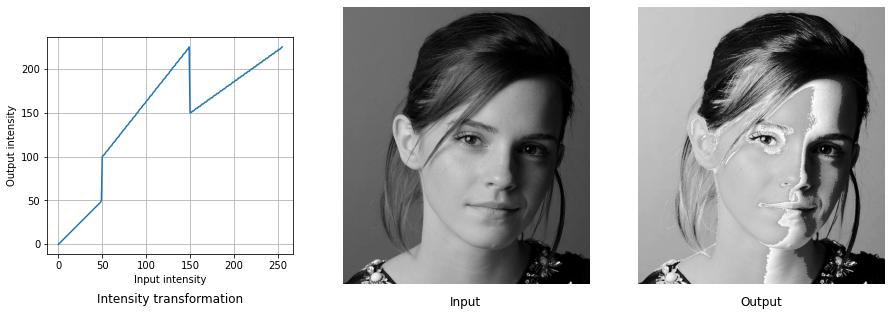

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
#create lookup table
array1 = np.linspace(0,50,50)
array2 = np.linspace(100,225,100)
array3 = np.linspace(150,225,106)
array_final = np.concatenate((array1,array2,array3)).astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(15,10))
img2 = cv.LUT(img,array_final)#mapping lookup table with image

ax[0].plot(array_final)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.25)

ax[1].imshow(img,cmap='gray')
ax[1].axis("off")
ax[1].set_title("Input",y=-0.1)
ax[2].imshow(img2,cmap='gray')
ax[2].axis("off")
ax[2].set_title("Output",y=-0.1)
plt.show()


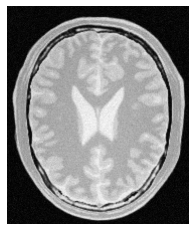

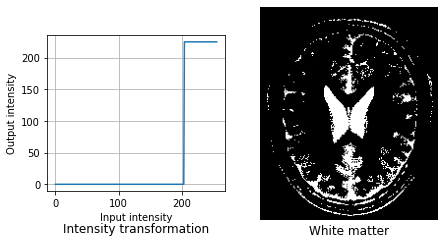

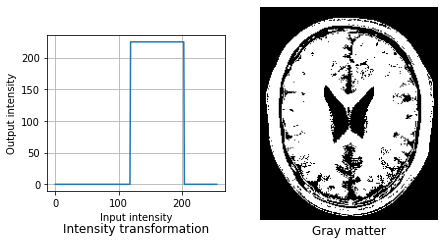

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
#import image
img = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
fig,ax=plt.subplots()
ax.imshow(img,cmap='gray')
plt.axis("off")
w_array1 = np.linspace(0,0,204)#white range 204-255
w_array2 = np.linspace(225,225,52)
g_array1 = np.linspace(0,0,119)#gary range 119-204
g_array2 = np.linspace(225,225,85)
g_array3 = np.linspace(0,0,52)

array_w= np.concatenate((w_array1,w_array2)).astype(np.uint8)#white matter lookup table
array_g= np.concatenate((g_array1,g_array2,g_array3)).astype(np.uint8)#gray matter lookup table

#mapping
imgW = cv.LUT(img,array_w)
imgG = cv.LUT(img,array_g)

#plotting
fig,ax = plt.subplots(1,2,figsize=(7,7))
ax[0].plot(array_w)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.3)

ax[1].imshow(imgW,cmap='gray')
ax[1].axis("off")
ax[1].set_title("White matter",y=-0.1)
plt.show()
fig,ax = plt.subplots(1,2,figsize=(7,7))
ax[0].plot(array_g)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.3)

ax[1].imshow(imgG,cmap='gray')
ax[1].axis("off")
ax[1].set_title("Gray matter",y=-0.1)
plt.show()

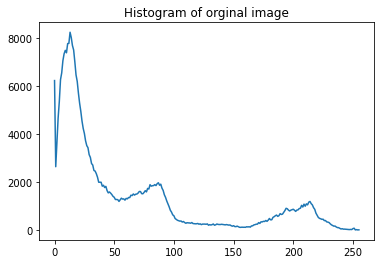

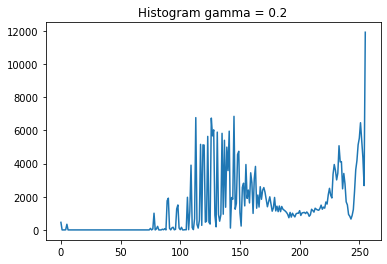

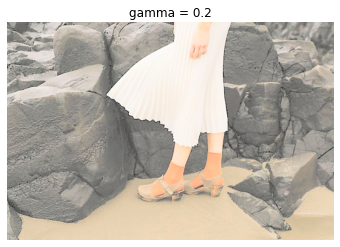

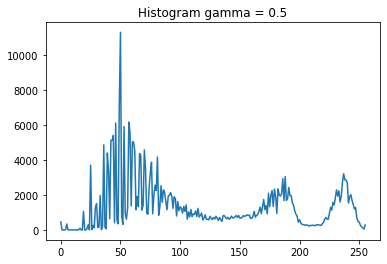

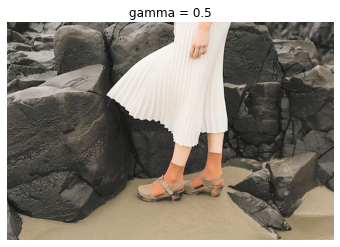

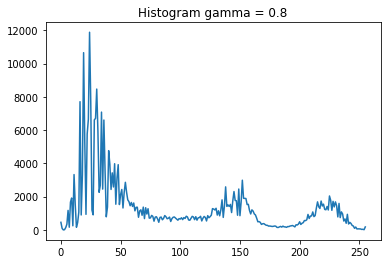

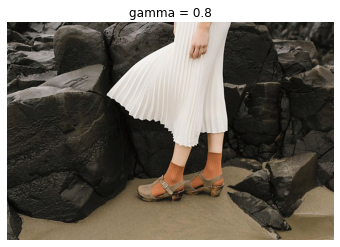

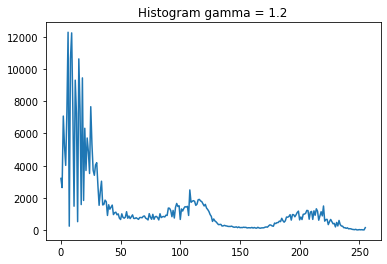

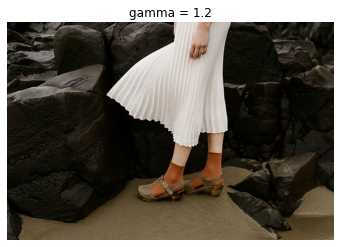

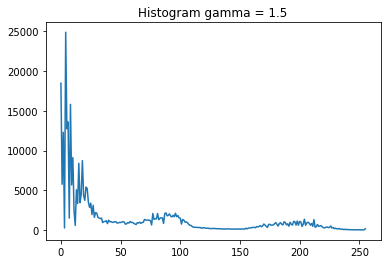

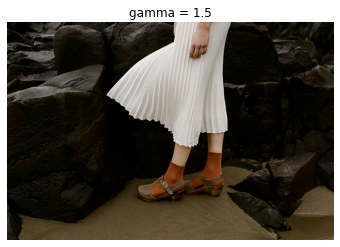

In [175]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
#plot histogram of original image
img_hist = cv.calcHist([img],[0],None,[256],[0,256])
f,a = plt.subplots()
plt.title("Histogram of orginal image")
a.plot(img_hist)
plt.show()
#convert image to Lab color space
img = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,a,b = cv.split(img)


gammaLst = [0.2,0.5,0.8,1.2,1.5]
for gamma in gammaLst:
    #add gamma correction
    t_L = np.array([(p/255.0)**gamma*255 for p in L]).astype(np.uint8)
    img2= cv.merge([t_L,a,b])
    img2=cv.cvtColor(img2,cv.COLOR_Lab2RGB)
    #ploting histograms
    fig,ax = plt.subplots()
    img_hist = cv.calcHist([img2],[0],None,[256],[0,256])
    ax.plot(img_hist)
    plt.title("Histogram gamma = "+str(gamma))
    plt.show()
    fig,ax = plt.subplots()
    ax.imshow(img2)
    plt.title("gamma = "+str(gamma))
    ax.axis("off")
    plt.show()


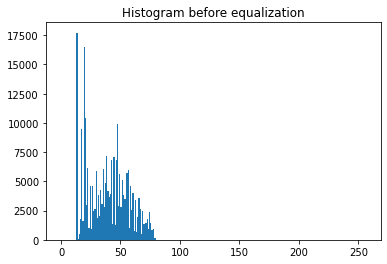

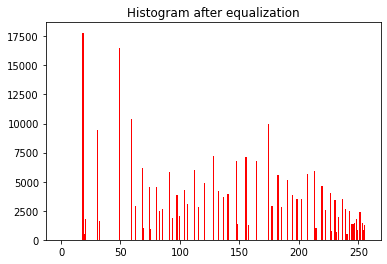

(-0.5, 999.5, 499.5, -0.5)

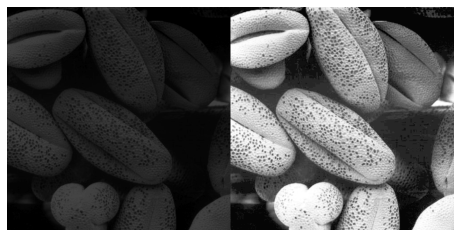

In [179]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#equalization funtion
def equalization(img):
    L=256
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    cdf=hist.cumsum() #calculate cdf
    eqcHist = np.round((L-1)*cdf/cdf.max()) #normalized between 0-255
    return cv.LUT(img,eqcHist) #mapping

#load image
img =cv.imread("shells.png",cv.IMREAD_GRAYSCALE)
plt.hist(img.flatten(),256,[0,256])
plt.title("Histogram before equalization")
plt.show()

#equalization
img2 = equalization(img)

#plot
plt.hist(img2.flatten(),256,[0,256],color='r')
plt.title("Histogram after equalization")
plt.show()


fig,ax=plt.subplots(1,1,figsize=(8,8))
pkc = np.hstack((img,img2))
ax.imshow(pkc,cmap='gray')
plt.axis('off')




[  9  92 127]
[ 86 158 104]


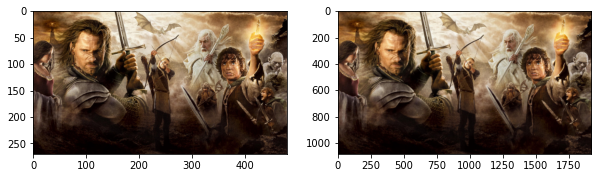

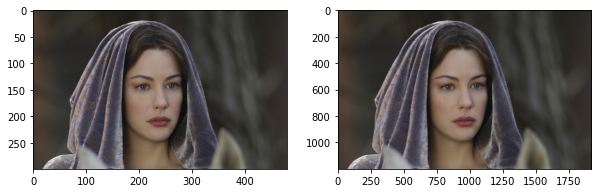

In [193]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def nearestNeighborZoom(img,s):
    rows= img.shape[0]*s   #scale rows
    colums =img.shape[1]*s #scale columns
    zoomed_img = np.zeros((rows,colums,3)).astype(np.uint8) #create empty array
    #zooming using nearest Neighbor method
    for r in range(rows):
        for c in range(colums):
            for h in range(3):
                zoomed_img[r][c][h]=img[r//s][c//s][h] 
    return zoomed_img

def ssd(img1,img2):
    return sum(sum((img1-img2)**2))

img1 =cv.imread("./New folder/im01small.png",cv.IMREAD_COLOR).astype(np.uint8)
img2 =cv.imread("./New folder/im02small.png",cv.IMREAD_COLOR).astype(np.uint8)
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)


img11 =cv.imread("./New folder/im01.png",cv.IMREAD_COLOR).astype(np.uint8)
img11=cv.cvtColor(img11,cv.COLOR_BGR2RGB)
img22 =cv.imread("./New folder/im02.png",cv.IMREAD_COLOR).astype(np.uint8)
img22=cv.cvtColor(img22,cv.COLOR_BGR2RGB)
zoomed_img1 = nearestNeighborZoom(img1,4)
print(ssd(zoomed_img1,img11))
zoomed_img2 = nearestNeighborZoom(img2,4)
print(ssd(zoomed_img2,img22))


fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img1)
ax[1].imshow(zoomed_img1)
plt.show()

fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img2)
ax[1].imshow(zoomed_img2)
plt.show()


[249 153 242]
[232 244 189]


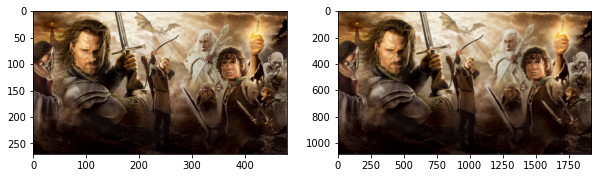

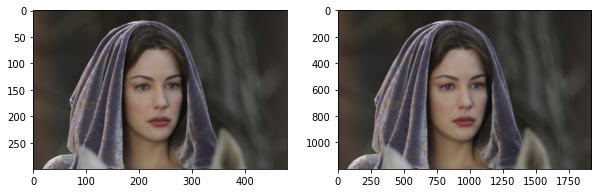

In [195]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
def bilinearInterpolationZoom(img,s):
    rows= img.shape[0]*s    #scale rows
    columns =img.shape[1]*s #scale colums
    zoomed_img = np.zeros((rows,columns,3)).astype(np.uint8) #create empty array
    #bilinear-Interpolation Zooming
    for r in range(rows):
        for c in range(columns):
            for h in range(3):
                x0,y0=r/s,c/s
                x,y=min(max(round(x0-0.5),0),img.shape[0]-2),min(max(round(y0-0.5),0),img.shape[1]-2) #x,y  must be in (0-img.shape) range
                x_ratio,y_ratio = x0-x,y0-y 
                 
                value11,value12,value21,value22 = img[x][y][h],img[x][y+1][h],img[x+1][y][h],img[x+1][y+1][h] #load data
                new_value_1 = value11*(1-x_ratio)+ value21 *x_ratio
                new_value_2 = value12*(1-x_ratio)+ value22 *x_ratio
                zoomed_img[r][c][h] = round(new_value_1*(1-y_ratio)+ new_value_2*y_ratio) #calculate final value
    return zoomed_img


    
img1 =cv.imread("./New folder/im01small.png",cv.IMREAD_COLOR).astype(np.uint8)
img2 =cv.imread("./New folder/im02small.png",cv.IMREAD_COLOR).astype(np.uint8)
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)

img11 =cv.imread("./New folder/im01.png",cv.IMREAD_COLOR).astype(np.uint8)
img11=cv.cvtColor(img11,cv.COLOR_BGR2RGB)
img22 =cv.imread("./New folder/im02.png",cv.IMREAD_COLOR).astype(np.uint8)
img22=cv.cvtColor(img22,cv.COLOR_BGR2RGB)

zoomed_img1 = bilinearInterpolationZoom(img1,4)
print(ssd(zoomed_img1,img11))
zoomed_img2 = bilinearInterpolationZoom(img2,4)
print(ssd(zoomed_img2,img22))   


fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img1)
ax[1].imshow(zoomed_img1)
plt.show()

fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img2)
ax[1].imshow(zoomed_img2)
plt.show()


[ 1  0 -1]


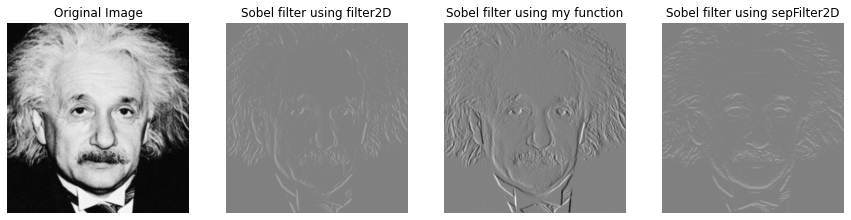

In [205]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#load image
img =cv.imread("einstein.png",cv.IMREAD_GRAYSCALE)

#Sobel filter using filter2D

#sobel vertical kernel
sobel_v = np.array([(-1,0,1),(-2,0,2),(-1,0,1)]) 
img_sobel_v = cv.filter2D(img,-1,sobel_v)




fig,ax = plt.subplots(1,4,figsize=(15,10))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(img_sobel_v,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("Sobel filter using filter2D")


#Sobel filter using my own function
def sobelFilter(img):
    
    sobel_v = np.array([(-1,0,1),(-2,0,2),(-1,0,1)])#sobel vertical kernal
    rows,columns=img.shape
    r_lim,c_lim = sobel_v.shape[0]//2,sobel_v.shape[1]//2 #find limts
    filteredImg = np.zeros(img.shape) #create empty array
    #converlution
    for r in range(r_lim,rows-r_lim):
        for c in range(c_lim,columns-c_lim):
            filteredImg[r][c] = np.dot(img[r-r_lim:r+r_lim+1,c-c_lim:c+c_lim+1].flatten(),sobel_v.flatten())
    return filteredImg

x=sobelFilter(img)
ax[2].imshow(x,cmap='gray')
ax[2].set_title("Sobel filter using my own function")

#Sobel filter using sepFilter2D
kernel1=np.array([[1],[2],[1]])
kernel2=np.array([1,0,-1])

img_s = cv.sepFilter2D(img,-1,kernel1,kernel2)

ax[3].imshow(img_s,cmap='gray',vmin=-1020,vmax=1020)
ax[3].set_title("Sobel filter using sepFilter2D")
ax[0].axis('off'),ax[1].axis('off'),ax[2].axis('off'),ax[3].axis('off')
plt.show()


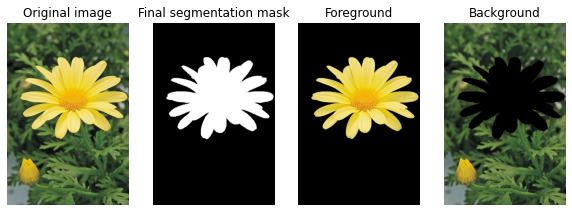

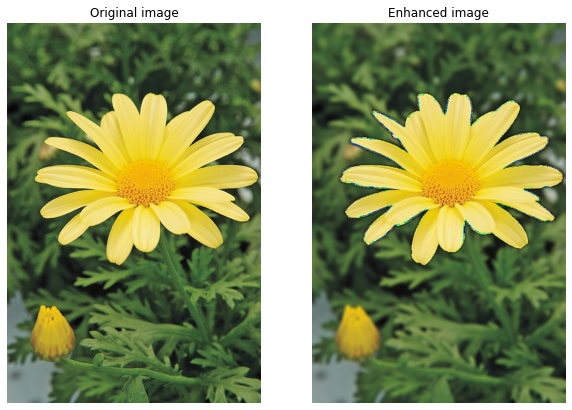

In [151]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread("daisy.jpg",cv.IMREAD_COLOR)
assert img is not None
img= cv.cvtColor(img,cv.COLOR_BGR2RGB)
mask1= np.zeros(img.shape[:2],np.uint8) #create empty mask with same size of image

rect =(55,145,555,490)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

mask1,bgdModel,fgdModel = cv.grabCut(img,mask1,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask1==2)|(mask1==0),0,1).astype('uint8')
final_mask = (mask2 * 255).astype(np.uint8)

foreground_img = img*mask2[:,:,np.newaxis]
background_img = img - foreground_img

final_mask = cv.cvtColor(final_mask,cv.COLOR_BGR2RGB)


fig,ax= plt.subplots(1,4,figsize=(10,8))
ax[0].imshow(img)
ax[1].imshow(final_mask)
ax[2].imshow(foreground_img)
ax[3].imshow(background_img)
ax[0].axis('off'),ax[1].axis('off'),ax[2].axis('off'),ax[3].axis('off')
ax[0].set_title("Original image"),ax[1].set_title("Final segmentation mask")
ax[2].set_title("Foreground"),ax[3].set_title("Background")
plt.show()

blurred_Background = cv.blur(background_img,(9,9))
enhanced_image = foreground_img+blurred_Background
fig,ax=plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(img)
ax[1].imshow(enhanced_image)
ax[0].axis('off'),ax[1].axis('off')
ax[0].set_title("Original image"),ax[1].set_title("Enhanced image")
plt.show()